# Script Overview

This script implements a **Bayesian Structural VAR (BSVAR) with agnostic identification** to isolate pure monetary policy shocks from the U.S. Federal Reserve and measure their impact on key Colombian macroeconomic variables (unemployment, inflation, policy rate, exchange rate – TRM – and 5-year TES yields). Identification relies on *soft* prior information drawn from an calibrated IS-LM-BP model rather than hard zero restrictions. The routine estimates the joint posterior of $\{A_0,\,C,\,B,\,\Sigma\}$ via a mixed Gibbs / Metropolis–Hastings sampler, computes impulse-response functions and forecast error variance decompositions, and outputs the dynamic responses of the Colombian economy to a pure Fed policy shock.  


### Model Specification

A Structural VAR of order $n$ is  
$$
A_0\,y_t = a_0 + \sum_{i=1}^n A_i\,y_{t-i} + C\,\varepsilon_t,\quad \varepsilon_t\sim \mathcal{N}(0,\Sigma),
$$
where $A_0$ captures contemporaneous effects, $A_i$ are lag‐coefficients and $C$ maps structural shocks.

 
Equivalently,
$$
y_t = \Psi\,x_t + u_t,\quad u_t\sim\mathcal{N}(0,\Omega),
$$
with
$$
\Psi = A_0^{-1}[A_1,\dots,A_n],\quad
u_t = A_0^{-1}C\,\varepsilon_t,\quad
\Omega = A_0^{-1}C\,\Sigma\,C'\,(A_0^{-1})'.
$$

#### Agnostic Identification  
Because  
$$
\Omega = A_0^{-1}C\,\Sigma\,C'\,(A_0^{-1})'
$$
is under‐identified, we impose **soft priors** on elements of $A_0$ and $C$ (expected value = $k$, not hard equality) following Baumeister & Hamilton (2015).  Parameters $\{A_0,C,\Sigma,B\}$ are estimated jointly:
- Draw $(A_0,C)$ via Metropolis–Hastings  
- Update $\{\Sigma,B\}$ from closed‐form posteriors

#### Prior  
Let $\theta=(A_0,C,\Sigma,B)$.  The joint prior factorizes as  
$$
p(\theta)
= p(A_0,C)\;\cdot\;p(\Sigma\mid A_0,C)\;\cdot\;p(B\mid A_0,C,\Sigma),
$$
with  
$$
p(\Sigma\mid A_0,C)
= \prod_{i=1}^n \mathrm{IG}(\nu_{0i},\tau_i),
\qquad
p(B\mid A_0,C,\Sigma)
= \mathcal{N\!M}(B_0,\Omega,H_0).
$$

#### Likelihood  
Assuming Gaussian reduced‐form errors,
$$
p(Y\mid B,\Omega)
\;\propto\;
|\Omega|^{-\frac{k}{2}}
\exp\!\Bigl[-\tfrac12\mathrm{tr}\bigl(\Omega^{-1}(B-\hat B)'X'X(B-\hat B)\bigr)\Bigr]
\;\times\;
|\Omega|^{-\frac{T-k}{2}}
\exp\!\Bigl[-\tfrac12\mathrm{tr}(\Omega^{-1}S)\Bigr].
$$

#### Posterior  
Closed‐form for $(B,\Sigma)$:
$$
\begin{aligned}
p(B\mid Y,A_0,C,\Sigma)
&= \mathcal{N\!M}(B_*,\;\Omega,\;H_*),\\
p(\sigma_i^2\mid Y,A_0,C)
&= \mathrm{IG}\bigl(\nu_{0i}+\tfrac{T}{2},\;\tau_i+\tfrac{\hat\tau_i+\tilde\gamma_i}{2}\bigr),
\end{aligned}
$$
while $(A_0,C)$ are sampled via Metropolis–Hastings under the conditional posterior
$$
p(A_0,C\mid Y)
\;\propto\;
p(A_0,C)\,
|A_0\,\hat S\,A_0'|^{\tfrac{T}{2}}\,
|C\,\hat S\,C'|^{-\tfrac{T}{2}}
\;\times\;
\prod_{i=1}^n
\frac{\tau_i^{\nu_{*i}}}{\tau_{*i}^{\nu_{*i}}}
\frac{\Gamma(\nu_{*i})}{\Gamma(\nu_{0i})}.
$$

*Source: J. Jacobo, Una introducción a los métodos de máxima entropía y de inferencia bayesiana en econometría.* 

#### APENDIX on Agnostic Identification 

Building on the basic setup, we follow Baumeister & Hamilton (2015) by treating identification restrictions as *soft priors* on the structural matrices rather than hard zeros or ones.  Denote the full parameter vector as  
$$
\theta = \bigl(A_0,\;C,\;B,\;\Sigma\bigr),
\quad B' = \Phi = A_0^{-1}A_+,
\quad \Omega = A_0^{-1}C\,\Sigma\,C'\,(A_0^{-1})'.
$$

**Joint Prior**  
We factorize the prior as  
$$
p(\theta)
= p(A_0,C)\;\times\;p(\Sigma\mid A_0,C)\;\times\;p(B\mid A_0,C,\Sigma).
$$  
1. **Structural‐shock prior** $p(A_0,C)$  
   - Each off‐diagonal element of $A_0$ is centered at zero, diagonals at one.  
   - Elements of $C$ centered at economically motivated values (e.g.\ impulse sign/ordering), with prior variance $\varsigma^2$ controlling tightness.  
   - Formally:  
     $$
     A_{0,ij}\sim \mathcal{N}(\bar A_{0,ij},\,\varsigma_{A,ij}^2),
     \quad
     C_{ij}\sim \mathcal{N}(\bar C_{ij},\,\varsigma_{C,ij}^2).
     $$

2. **Variance prior**  
   $$
   p(\Sigma\mid A_0,C)
   = \prod_{i=1}^n \mathrm{IG}\bigl(\nu_{0i},\,\tau_i\bigr),
   $$  
   where Minnesota‐style scaling sets  
   $$
   \tau_i = (\nu_{0i}-1)\,\bigl[\mathrm{diag}\bigl(C^{-1}A_0\,S_0\,A_0'(C^{-1})'\bigr)\bigr]_i,
   $$  
   and $S_0$ is a pilot estimate of the reduced‐form residual covariance.

3. **Lag‐coefficient prior**  
   $$
   p(B\mid A_0,C,\Sigma)
   = \mathcal{N\!M}\bigl(B_0,\;\Omega,\;H_0\bigr),
   $$  
   with $B_0$ and $H_0$ chosen via standard Minnesota rules (own‐lag tightness, cross‐lag decay, intercept scaling).

**Likelihood**  
Assuming Gaussian reduced‐form residuals,
$$
p(Y\mid B,\Omega)
\propto
|\Omega|^{-\tfrac{k}{2}}
\exp\!\Bigl[-\tfrac12\mathrm{tr}\bigl(\Omega^{-1}(B-\hat B)'X'X(B-\hat B)\bigr)\Bigr]
\;\times\;
|\Omega|^{-\tfrac{T-k}{2}}
\exp\!\Bigl[-\tfrac12\mathrm{tr}(\Omega^{-1}S)\Bigr].
$$

**Posterior Sampling**  
1. **Gibbs updates** for $(B,\Sigma)$ have closed‐form:  
   $$
   p(B\mid Y,A_0,C,\Sigma)
   = \mathcal{N\!M}\bigl(B_*,\,\Omega,\,H_*\bigr),
   \quad
   
   p(\sigma_i^2\mid Y,A_0,C)
   = \mathrm{IG}\bigl(\nu_{0i}+\tfrac T2,\;\tau_i+\tfrac{\hat\tau_i+\tilde\gamma_i}2\bigr).
   \quad
   
   p(\Sigma \mid Y, A_0, C) = \prod_{i=1}^n p(\sigma_i^2 \mid Y, A_0, C)
   $$
2. **Metropolis–Hastings** for $(A_0,C)$ under  
   $$
   p(A_0,C\mid Y)
   \propto
   p(A_0,C)\,
   |A_0\,\hat S\,A_0'|^{\tfrac T2}\,
   |C\,\hat S\,C'|^{-\tfrac T2}
   \;\times\;
   \prod_{i=1}^n
   \frac{\tau_i^{\nu_{*i}}}{\tau_{*i}^{\nu_{*i}}}
   \frac{\Gamma(\nu_{*i})}{\Gamma(\nu_{0i})},
   $$  
   ensuring that the *soft* restrictions in $p(A_0,C)$ guide but do not strictly enforce identification.


## Librarys

In [1]:
import pandas as pd 
import numpy as np 
import math 
from scipy.stats import t ,norm , matrix_normal , invgamma , beta
from scipy.linalg import det 
from scipy.special import gammaln , multigammaln ,gamma
from scipy.optimize import differential_evolution , minimize
from numpy.linalg import inv as inv
import numdifftools as nd
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

## Load data and create the averages per quarter:

In [2]:

tes = pd.read_excel('TES 5 años.xlsx')
desempleo = pd.read_excel('Desempleo.xlsx')
dolar = pd.read_excel('Dolar.xlsx')
inflacion = pd.read_excel('Inflacion.xlsx')
tbills = pd.read_excel('Tbills 5 años.xlsx')
tpm = pd.read_excel('TPM.xlsx')

tes['Fecha'] = pd.to_datetime(tes['Fecha'], format='%Y-%m-%d')
desempleo['Fecha'] = pd.to_datetime(desempleo['Fecha'], format='%Y-%m-%d')
dolar['Fecha'] = pd.to_datetime(dolar['Fecha'], format='%Y-%m-%d')
inflacion['Fecha'] = pd.to_datetime(inflacion['Fecha'], format='%Y-%m-%d')
tbills['Fecha'] = pd.to_datetime(tbills['Fecha'], format='%Y-%m-%d')
tpm['Fecha'] = pd.to_datetime(tpm['Fecha'], format='%Y-%m-%d')

tes = tes.set_index('Fecha')
desempleo = desempleo.set_index('Fecha')
dolar = dolar.set_index('Fecha')
inflacion = inflacion.set_index('Fecha')
tbills = tbills.set_index('Fecha')
tpm = tpm.set_index('Fecha')

tes_trimestral = tes.resample('QE').mean()[:-1]
desempleo_trimestral = desempleo.resample('QE').mean()
dolar_trimestral = dolar.resample('QE').mean()[:-1]
inflacion_trimestral = inflacion.resample('QE').mean()
tbills_trimestral = tbills.resample('QE').mean()[:-1]
tpm_trimestral = tpm.resample('QE').mean()[:-1]

l = [tbills_trimestral , tes_trimestral , dolar_trimestral , inflacion_trimestral , tpm_trimestral , desempleo_trimestral ]

In [3]:
df_final = pd.concat(l, axis=1).reset_index().drop(columns='Fecha')
df_final = (df_final - df_final.mean()) / df_final.std() ### Normalze de Data 
df_final

,T Bills,TES,TRM,Inflación total,Tasa de política monetaria,Desempleo
0,0.347309,2.645614,0.186672,0.912854,-0.017542,1.714934
1,0.083914,2.389194,0.104134,0.985112,0.296155,1.205080
2,0.521713,2.141396,0.086913,0.807047,0.402997,1.388503
3,0.603822,2.071840,0.071504,0.521885,0.402997,0.704552
4,0.400607,1.601283,-0.082807,0.454789,0.358161,1.918565
...,...,...,...,...,...,...
84,1.279863,0.337524,1.353860,1.070273,2.330907,0.222677
85,1.543654,0.659027,1.367034,0.818660,2.024693,-0.436403
86,1.031393,0.464615,1.567935,0.468982,1.678703,-0.851437
87,1.280957,0.574296,1.870455,0.084466,1.321640,-1.205848


## Numpy array of the data 

In [4]:
YY = df_final.to_numpy()
YY[:10 , :]

array([[ 0.34730868,  2.64561429,  0.18667243,  0.91285373, -0.01754204,
         1.71493396],
       [ 0.08391447,  2.38919446,  0.10413373,  0.98511189,  0.29615543,
         1.20507952],
       [ 0.5217126 ,  2.14139571,  0.08691262,  0.80704713,  0.40299657,
         1.38850276],
       [ 0.60382209,  2.0718401 ,  0.07150443,  0.52188545,  0.40299657,
         0.70455169],
       [ 0.40060694,  1.60128319, -0.08280685,  0.45478859,  0.35816145,
         1.91856484],
       [ 0.97085226,  1.74629933, -0.10720818,  0.22898183,  0.22937971,
         1.30456331],
       [ 0.80490876,  1.87565464, -0.21598044,  0.37349815,  0.22937971,
         0.63304772],
       [ 0.79572679,  1.46281375, -0.32856131,  0.26640123,  0.21805687,
         0.29418105],
       [ 1.10174046,  1.16443196, -0.51211209,  0.07156226,  0.14257128,
         0.95170674],
       [ 1.08798451,  0.97242423, -0.52828533, -0.03553466,  0.14257128,
         0.28951775]])

## SBVAR: 

In [5]:
def decorador_1(func):
    c=0
    def wrapped(*args):
        nonlocal c 
        c=c+1
        print('Metropolis - Hastings ha generado' , c , 'muestras de la posterior')
        return func(*args)       
    return wrapped 

def decorador_2(func):
    def wrapped(*args):
        time1 = time.time()
        rta = func(*args)
        time2 = time.time()
        print('La funcion demoro' , time2-time1)
        return rta 
    return wrapped 

################## SBVARs ##################

n=YY.shape[1]
m=3 # lags
k= n*m+1 # number of parameters per equation 
nalpha = 15 # num. variables in A0 matrix
Y=YY[m: , :]
T=Y.shape[0] 
X=np.ones((T,k))
for i in range(0, m):
    X[:, (i*n):(i+1)*n] = YY[m-i-1:-i-1, :]

# build the prior
e=  np.zeros((Y.shape[0], n))
for i in range (n):
    e1 = Y[:,i] - X[: , i::n] @ np.linalg.solve((X[:,i::n].T @ X[:,i::n]), (X[:,i::n].T @ Y[:,i]))
    e[:, i] = e1

S00 = np.zeros(n)
for i in range(n):
    S01= (e[: , i].T @ (e[: , i])/T)
    S00[i: , ] = S01
S0 = np.diag(S00)

# Minnesota prior
lambda0 , lambda1 ,lambda3 =   0.1 , 0.1 , 10
eta = 0.75 * np.hstack((np.eye(n) , np.zeros((n , n*(m-1)+1))))
v1 = np.zeros(m+1)
for i in range(1 , m+1):\
    v1[i] = (1/(i**(2*lambda1)))
v1 = v1[1:]
v2 = np.diag(inv(S0))
v3 = lambda0 **(2) * np.append(np.kron(v1 , v2) , lambda3**(2))
M = np.diag(v3)
phi0 = eta.T


# Maximum likelihood estimators
PHI = inv(X.T @ X) @ (X.T @Y)
OMEGA = (Y - X@PHI).T@ (Y - X@PHI)
kappa = 2
S2 = (PHI - phi0).T @ inv(M + inv(X.T@X)) @ (PHI - phi0)


# Construction of matrix A0 Given the configuration of the research. You can see more of this in the paper
def A0_Mtx(phi1):
    x1 ,x2,x3,x4= phi1[0], phi1[1] ,phi1[2] ,phi1[3]
    x5 ,x6,x7,x8= phi1[4], phi1[5] ,phi1[6] ,phi1[7]
    x9 ,x10,x12= phi1[8] ,phi1[9] ,phi1[10]
    x13 ,x14,x15,x16= phi1[11], phi1[12] ,phi1[13] ,phi1[14]

    A = np.array([[1 , 0 ,0 ,0, 0,0] , [-x1 , 1, -x2 , 0 , -x3,0] , [-x4, -x5, 1 ,0 ,-x6,0] , [0, 0, -x7 ,1 ,0,-x8],
                  [-x9 ,-x10,0,-x12 ,1 , -x13] , [0 ,-x14,0,-x15 ,-x16 , 1]])
    return A

# Function of the posterior of B parameters
def posterior_B(theta1 , theta2 , Y , X , M , Phi0):
    """
    Draws a sample from the posterior of the reduced‐form coefficient matrix B 
    under a Normal–Minnesota prior and Gaussian likelihood.

    What it does:
    1. Reconstructs the structural matrix A₀ from `theta1`.
    2. Builds D = diag(sigma_i²) using `theta2` (vector of error variances).
    3. Computes the reduced‐form covariance Ω = A₀⁻¹ · D · (A₀⁻¹)'.
    4. Forms the posterior covariance of B: (M⁻¹ + X'X)⁻¹.
    5. Computes the posterior mean: 
       M_si · (M⁻¹·Phi0 + X'·Y).
    6. Draws one sample from the MatrixNormal distribution:
       B ∼ MN(mean=B_s, rowcov=M_si, colcov=Ω).

    Parameters
    ----------  
    theta1:  Vector encoding structural parameters for A₀.
    theta2:  Diagonal variances (σ₁²,…,σₙ²) for the reduced‐form errors.
    Y: T×k matrix of endogenous observations.
    M:  Prior row‐covariance matrix for B.
    Phi0: Prior mean matrix for B.

    """
    A = A0_Mtx(theta1)
    D = np.diag(theta2)
    A0i = inv(A)
    Omega = np.matrix(A0i @ D @ A0i.T)
    Omega = Omega.getH()
    Omega = np.asarray(Omega)

    # posterior covariance of B
    M_si = np.matrix(inv(inv(M)+X.T@X))
    M_si = M_si.getH()
    M_si = np.asarray(M_si)
    
    # posterior media of B
    B_s = M_si @ (inv(M) @ Phi0 + X.T @ Y)

    # sampling from the normal matrix distribution
    return matrix_normal.rvs(B_s , M_si , Omega)


# Function of the posterior of Sigma 
def Posterior_D(theta1 , Y , X , M , phi0 , S0 , omega , S2):
    """
    Samples the diagonal error‐variance vector (σ₁²,…,σₙ²) from its conditional
    Inverse‐Gamma posterior, given structural parameters and data.

    What it does:
    1. Reconstructs A₀ from `theta1`.
    2. Scales the pilot covariance S0 by (κ−1) and transforms via A₀:
       Sz0 = (κ−1)*A₀·S0·A₀'.
    3. Sets the posterior shape κ₁ = (κ + T)/2.
    4. For each i, computes the scale ts_i = diag(Sz0)[i] + 0.5*(diag(Sz0)[i] + diag(Sz0)[i])
       and draws σᵢ² ∼ Inverse‐Gamma(κ₁, scale=ts_i).
    """
    
    kappa = 2
    A = A0_Mtx(theta1)
    Sz0 = np.matrix((kappa-1) * A @ S0 @ A.T)
    Sz0 = Sz0.getH()
    Sz0 = np.asarray(Sz0)
    d = np.zeros(n)
    kappa1 = (kappa + T) / 2
    t = np.diag(Sz0) 
    for i in range(n):
        ts = (t[i] + 0.5*(t[i]+t[i]))
        d[i] = invgamma.rvs(kappa1 ,scale=ts)
    return d

##### Truncated t distribution for sing restricctions over A0 coeficients #####

# Helper function to check truncation intervals
def logsubexp(a, b):
    if a == b:
        return -np.inf  
    elif b > a:
        raise ValueError("The argument 'a' must be greater than 'b' for the result to be real.")
    else:
        return a + np.log1p(-np.exp(b - a))
    

def logpdf_truncated_t(loc, scale, df, a, b, αs):
    """
    Computes the log‐density of a Student’s t distribution truncated to [a, b] at the point αs.

    What it does:
    1. Checks if αs lies outside the truncation interval [a, b]; if so, returns –inf.
    2. Evaluates the log‐PDF of a t(df, loc, scale) at αs.
    3. Computes log‐CDF at the bounds a and b.
    4. Uses log‐subtraction to form the normalizing constant log(F(b)−F(a)).
    5. Subtracts that from the log‐PDF to get the truncated log‐density.

    Returns
    -------
    float
        Log‐density of the truncated t at αs, or –inf if αs is outside [a, b].

    """

    # Check truncation interval compatibility with sign of αs
    if a >= 0 and b > 0:
        if αs < 0:
            return -np.inf
    if a < 0 and b <= 0:
        if αs > 0:
            return -np.inf

    dist = t(df, loc=loc, scale=scale)
    logpdf_value = dist.logpdf(αs)

    log_cdf_a = dist.logcdf(a)
    log_cdf_b = dist.logcdf(b)
    try:
        normalization_factor = logsubexp(log_cdf_b, log_cdf_a)
    except ValueError:
        return -np.inf

    logpdf_truncated = logpdf_value - normalization_factor

    return logpdf_truncated


##### Asymmetric t-distribution for sing restrictions on the IRFs #####

def T_Asimetric(mu_h, sigma_h, v_h, lambda_h, h):
    """
    Computes the log‐density of an asymmetric Student’s t distribution,
    used to impose sign restrictions on impulse‐response functions.

    What it does:
    1. Standardizes the input: x = (h - mu_h) / sigma_h.
    2. Evaluates the symmetric t log‐PDF component:
         - term1: scale adjustment.
         - term2 & term3: normalization constants via gamma functions.
         - term4: heavy‐tail penalty.
    3. Computes an asymmetry factor via the Gaussian CDF:
         norm.logcdf((h * lambda_h) / sigma_h).
    4. Adds both logs to form the final asymmetric log‐density.

    Returns
    -------
    float or ndarray
        Asymmetric t log‐density at each h, combining the symmetric t log‐PDF
        and a skewing factor from the normal CDF.
    """

    x = (h - mu_h) / sigma_h

    term1 = -np.log(sigma_h)
    term2 = gammaln((v_h + 1) / 2) - gammaln(v_h / 2)
    term3 = -0.5 * np.log(v_h * np.pi)
    term4 = -((v_h + 1) / 2) * np.log1p((x ** 2) / v_h)  

    log_phiv = term1 + term2 + term3 + term4
    log_cdf = norm.logcdf((h * lambda_h) / sigma_h)

    log_ph = log_phiv + log_cdf

    return log_ph

def qA(theta1):
    """
    Computes a positive objective proportional to the negative log-posterior for
    structural parameters under agnostic identification with sign restrictions.

    What it does:
    1. Applies a truncated‐t log‐prior to each entry in `theta1`.
    2. Reconstructs A₀ and inverts it to get H = A₀⁻¹.
    3. Extracts five impulse‐response entries (H[1,0], H[2,0], H[5,0], H[3,0], H[2,0])
       corresponding to policy‐shock effects on TES yields, exchange rate, unemployment,
       inflation, and policy rate.
    4. Evaluates asymmetric‐t densities on those IRF values to impose sign restrictions.
    5. Builds transformed covariance matrices S0ar, Sar, S2ar via A₀·S·A₀'.
    6. Computes a log‐determinant penalty on Sar and a scale penalty combining diagonals
       of S0ar, Sar, and S2ar.
    7. Assembles the final objective = –(sum of log‐priors + log‐IRF penalties)
       – (T/2)*log|Sar| + scale penalty. Returns 1e5 if non‐positive.

    Parameters
    ----------
    theta1 : array-like
        Vector of free parameters defining the contemporaneous matrix A₀.

    Returns
    -------
    float
        A large positive value representing the penalized negative log‐posterior.
    """
    # symmetric truncated‐t log‐priors on all theta entries
    logpdf_values = sum(
        logpdf_truncated_t(0, 8, 3, -np.inf, np.inf, th)
        for th in theta1
    )

    # reconstruct A₀ and its inverse H
    A = A0_Mtx(theta1)
    H = np.linalg.inv(A)

    # 3) extract IRF entries for sign restrictions
    restr1 = H[1, 0]  # TES increase
    restr2 = H[2, 0]  # exchange rate increase
    restr3 = H[5, 0]  # unemployment decrease
    restr4 = H[3, 0]  # inflation increase
    restr5 = H[4, 0]  # policy rate increase

    # asymmetric‐t densities on those IRFs. These sign restrictions come from the IS-LM-BP model simulating an increase in the interest rate of the foreign country 
    tasimetric_values = [
        T_Asimetric(5, 1, 3, 1, restr1),
        T_Asimetric(5, 1, 3, 1, restr2),
        T_Asimetric(-0.245, 1.0, 5, -3, restr3),
        T_Asimetric(5, 1, 3, 1, restr4),
        T_Asimetric(5, 1, 3, 1, restr5),
    ]

    LogpA = logpdf_values + sum(tasimetric_values)

    # build covariance transforms and penalties
    S0ar = (kappa - 1) * A @ S0 @ A.T
    Sar  = A @ OMEGA @ A.T
    S2ar = A @ S2 @ A.T

    t   = np.diag(S0ar)
    t1  = np.diag(Sar)
    t2  = np.diag(S2ar)
    ts  = t + 0.5 * (t1 + t2)

    # log‐determinant penalty
    Determinante = np.log(np.linalg.det(Sar))

    # scale penalty
    log_ts = (kappa + 0.5 * T) * np.log(ts) - kappa * np.log(t)
    final_log_ts = np.sum(log_ts)

    # assemble objective
    Objetivo = -LogpA - (T / 2) * Determinante + final_log_ts

    return 1e5 if Objetivo <= 0 else Objetivo


## Find the values ​​of the matrix $A_0$ that maximize $qA$

In [6]:
bounds = [(-5,5) for _ in range(15)]
x0 = np.zeros(len(bounds))
res = minimize(qA, x0, method='L-BFGS-B', bounds=bounds)
res

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: 35.348405431597826
        x: [ 2.741e-01 -2.585e-01 ...  3.785e+00 -4.219e+00]
      nit: 129
      jac: [-1.194e-04  6.025e-04 ... -6.139e-04 -1.990e-04]
     nfev: 2336
     njev: 146
 hess_inv: <15x15 LbfgsInvHessProduct with dtype=float64>

In [7]:
optimos = res.x 
hessian_func = nd.Hessian(qA)
numerical_hessian = hessian_func(optimos)
ta = 0.25
Vmo = ta * inv(numerical_hessian)
eigenvalues = np.linalg.eigvals(Vmo)
es_definida_positiva = np.all(eigenvalues > 0)

if es_definida_positiva:
    print("The matrix is ​​already positive definite.")
else:
    print("The matrix is ​​not positive definite")

The matrix is ​​already positive definite.


## If the matrix is not SDP run this:

In [7]:
def make_spd_eig(A, tau=1e-6):
    """
    Project a (nearly) symmetric matrix onto the space of symmetric positive-definite (SPD)
    matrices by clipping its eigenvalues.

    What it does:
    1. Enforces numerical symmetry by averaging A with its transpose.
    2. Computes the eigenvalue decomposition of the symmetric matrix.
    3. Clips any eigenvalue below `tau` up to `tau`, ensuring all eigenvalues are ≥ `tau`.
    4. Reconstructs the SPD matrix from the clipped spectrum.

    Parameters
    ----------
    A : ndarray, shape (n, n)
        Input square matrix to be regularized. It should be symmetric up to numerical noise.
    tau : float, optional
        Minimum eigenvalue threshold. Any eigenvalue less than `tau` will be set to `tau`
        (default is 1e-6).

    Returns
    -------
    A_spd : ndarray, shape (n, n)
        A symmetric positive-definite matrix closest to the input in Frobenius norm,
        obtained by eigenvalue clipping.
    """
    # Ensure symmetry: average with transpose
    A_sym = 0.5 * (A + A.T)

    # Eigen-decompose the symmetric matrix
    eigvals, eigvecs = np.linalg.eigh(A_sym)

    # Clip eigenvalues at the minimum threshold tau
    eigvals_clipped = np.maximum(eigvals, tau)

    # Reconstruct the SPD matrix using the clipped eigenvalues
    A_spd = eigvecs @ np.diag(eigvals_clipped) @ eigvecs.T

    return A_spd

optimos = res.x 
hessian_func = nd.Hessian(qA)
H_num = hessian_func(optimos)

H_spd   = make_spd_eig(H_num, tau=1e-6)
d       = H_spd.shape[0]
scale   = (2.38**2) / d       
Vmo     = scale * np.linalg.inv(H_spd)
eigenvalues = np.linalg.eigvals(Vmo)
es_definida_positiva = np.all(eigenvalues > 0)

if es_definida_positiva:
    print("The matrix is ​​already positive definite.")
else:
    print("The matrix is ​​not positive definite")

The matrix is ​​already positive definite.


## Metropolis Hastings and MCMC sampling

In [8]:
# Hastings Metropolis Algorithm
def Metropolis_Hastings(theta , Vmo , rng=None):
    """
    Performs one Metropolis–Hastings update for structural parameters θ.

    What it does:
    1. Proposes a new candidate θ' by drawing from a multivariate normal centered at θ with covariance Vmo.
    2. Computes the acceptance ratio r = exp[–qA(θ') + qA(θ)], where qA evaluates the (negative) log-posterior objective.
    3. Draws u ∼ Uniform(0,1). If u < min(1, r), accepts the proposal (θ ← θ'); otherwise, retains the current θ.
    4. Returns the updated θ.

    Parameters
    ----------
    theta : ndarray, shape (d,)
        Current parameter vector (free entries of A₀ and C).
    Vmo : ndarray, shape (d, d)
        Proposal covariance matrix for the random-walk multivariate normal.

    Returns
    -------
    ndarray, shape (d,)
        The next draw of θ: either the new candidate (if accepted) or the original (if rejected).
    """
    if rng is None:
        rng = np.random.default_rng()

    # --- candidate ---
    cand = rng.multivariate_normal(theta, Vmo)

    # --- 2. rate in log (overflow) ---
    log_r = -qA(cand) + qA(theta)        # qA = –log-posterior
    accept = False
    if np.log(rng.random()) < min(0.0, log_r):   # acceptance if log(u) < log_r
        theta, accept = cand, True

    return theta, accept 

# Generate samples of the posterior.
@decorador_2
def MCMC_Metropolis_Hastings(R, theta, Y, X, M, phi0, S0, omega, S2, Vmo, b=5000):
    """
    Runs a hybrid Gibbs–Metropolis–Hastings sampler with adaptive proposal scaling
    to draw from the joint posterior of structural parameters (A₀, C), error variances Σ,
    and reduced-form coefficients B.

    What it does:
    1. Allocates storage for:
       - theta_s1: structural draws of shape (nalpha, R)
       - theta_s2: variance draws of shape (n, R)
       - theta_s3: B draws of shape (R, k, n)
    2. Initializes theta1 = theta as the starting state.
    3. Repeats for i in 0…R-1:
       a. **Metropolis–Hastings** step: propose and accept/reject a new theta1 using Vmo.
       b. **Gibbs** draw for Σ via Posterior_D.
       c. **Gibbs** draw for B via posterior_B.
       d. Store each draw in the arrays.
       e. During the first `warmup` iterations, adapt Vmo every `adapt_block` steps
          to target an acceptance rate near 25%.
    4. After R iterations, discards the first `b` samples as burn-in and returns the rest.

    Parameters
    ----------
    R      : int
        Total number of MCMC iterations.
    Vmo    : ndarray, shape (d, d)
        Current proposal covariance matrix (must be SPD).
    b      : int, optional
        Number of initial samples to discard as burn-in (default=5000).

    Returns
    -------
    theta_s1[:, b:], theta_s2[:, b:], theta_s3[b:, :, :]
        Posterior samples for (A₀,C), Σ, and B after burn-in.
    """
    # initialize storage arrays
    theta_s1 = np.zeros((nalpha, R))
    theta_s2 = np.zeros((n, R))
    theta_s3 = np.zeros((R, k, n))

    # adaptive tuning variables
    accepted_last100 = 0        # count of acceptances in the last adapt_block
    adapt_block      = 100      # adjust Vmo every this many iterations
    warmup           = b        # number of iterations to adapt Vmo
    rng              = np.random.default_rng()

    theta1 = theta
    for i in range(R):
        # Metropolis–Hastings update for structural parameters
        theta1, accepted = Metropolis_Hastings(theta1, Vmo, rng)
        accepted_last100 += int(accepted)
        # Gibbs draw for error variances Σ
        theta2 = Posterior_D(theta1, Y, X, M, phi0, S0, omega, S2)
        # Gibbs draw for reduced-form coefficients B
        theta3 = posterior_B(theta1, theta2, Y, X, M, phi0)

        theta_s1[:, i] = theta1
        theta_s2[:, i] = theta2
        theta_s3[i, :, :] = theta3
        
        # adapt proposal covariance during warmup
        if i < warmup and (i + 1) % adapt_block == 0:
            rate = accepted_last100 / adapt_block
            if rate < 0.15:
                Vmo *= 0.5    # decrease step size if acceptance is too low
            elif rate > 0.35:
                Vmo *= 2.0    # increase step size if acceptance is too high
            accepted_last100 = 0
            print(f"Iter: {i+1} , accept-rate: {rate:.2f}")

    # discard burn-in samples and return
    return theta_s1[:, b:], theta_s2[:, b:], theta_s3[b:, :, :]


In [9]:
R=100000
Posterior_A0_MCMC , Posterior_D_MCMC , Posterior_B_MCMC = MCMC_Metropolis_Hastings(R , optimos , Y , X , M , phi0 , S0 , OMEGA , S2 , Vmo, 15000 )

Iter: 100 , accept-rate: 0.35
Iter: 200 , accept-rate: 0.52
Iter: 300 , accept-rate: 0.29
Iter: 400 , accept-rate: 0.29
Iter: 500 , accept-rate: 0.32
Iter: 600 , accept-rate: 0.30
Iter: 700 , accept-rate: 0.20
Iter: 800 , accept-rate: 0.27
Iter: 900 , accept-rate: 0.53
Iter: 1000 , accept-rate: 0.22
Iter: 1100 , accept-rate: 0.18
Iter: 1200 , accept-rate: 0.18
Iter: 1300 , accept-rate: 0.23
Iter: 1400 , accept-rate: 0.20
Iter: 1500 , accept-rate: 0.24
Iter: 1600 , accept-rate: 0.19
Iter: 1700 , accept-rate: 0.20
Iter: 1800 , accept-rate: 0.18
Iter: 1900 , accept-rate: 0.30
Iter: 2000 , accept-rate: 0.30
Iter: 2100 , accept-rate: 0.28
Iter: 2200 , accept-rate: 0.28
Iter: 2300 , accept-rate: 0.19
Iter: 2400 , accept-rate: 0.19
Iter: 2500 , accept-rate: 0.19
Iter: 2600 , accept-rate: 0.24
Iter: 2700 , accept-rate: 0.24
Iter: 2800 , accept-rate: 0.23
Iter: 2900 , accept-rate: 0.15
Iter: 3000 , accept-rate: 0.32
Iter: 3100 , accept-rate: 0.21
Iter: 3200 , accept-rate: 0.20
Iter: 3300 , acce

In [10]:
print('Posterior CoVariance Dimensions' , Posterior_D_MCMC.shape)
print('Dimensions of the posterior of the coefficients (reduced form)' , Posterior_B_MCMC.shape)
print('Dimensions of the posterior structural parameters' , Posterior_A0_MCMC.shape)

Posterior CoVariance Dimensions (6, 85000)
Dimensions of the posterior of the coefficients (reduced form) (85000, 19, 6)
Dimensions of the posterior structural parameters (15, 85000)


## Markov Chain Analysis

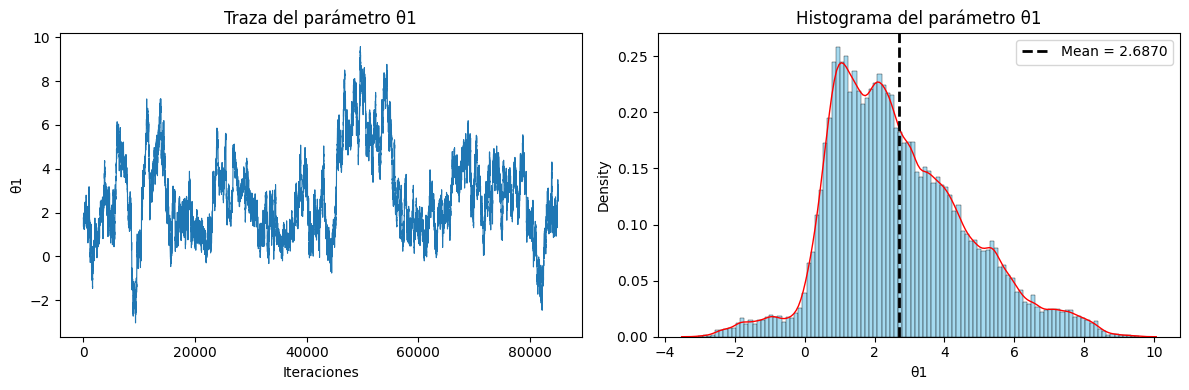

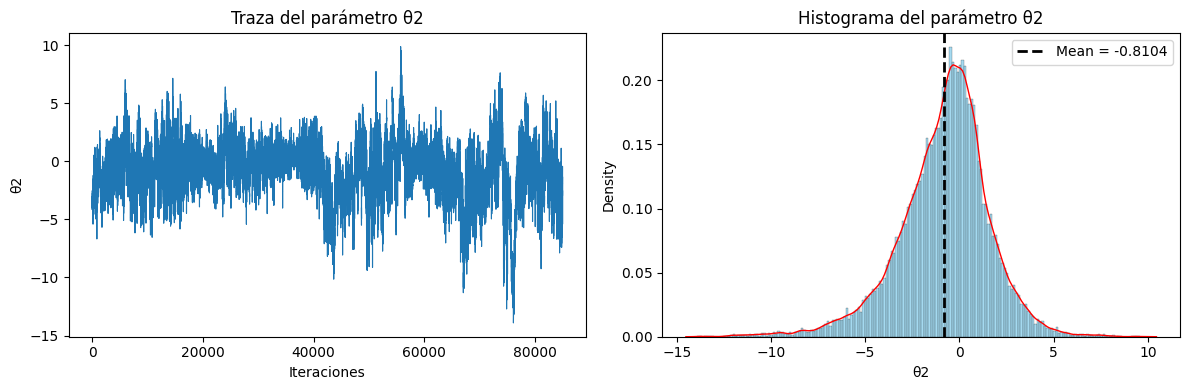

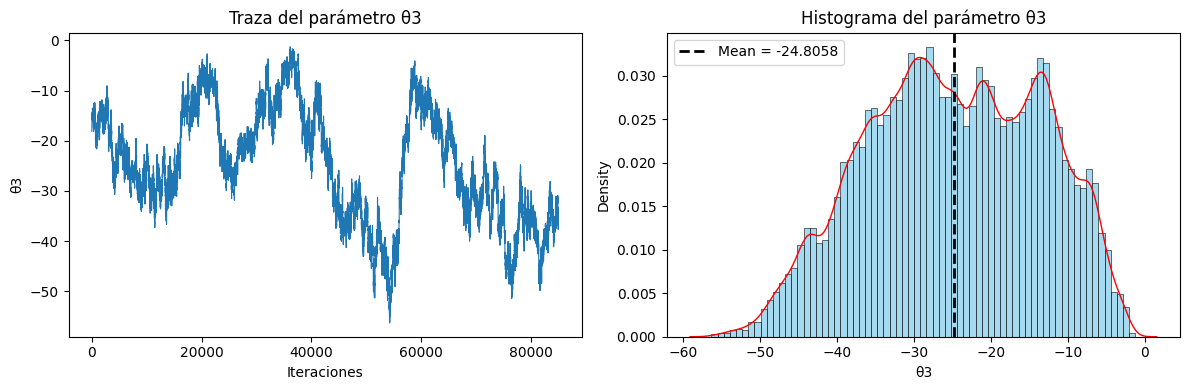

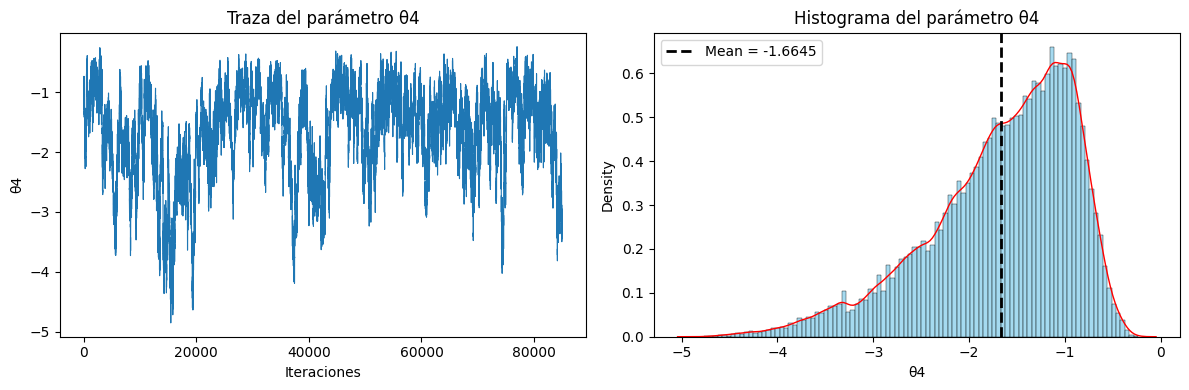

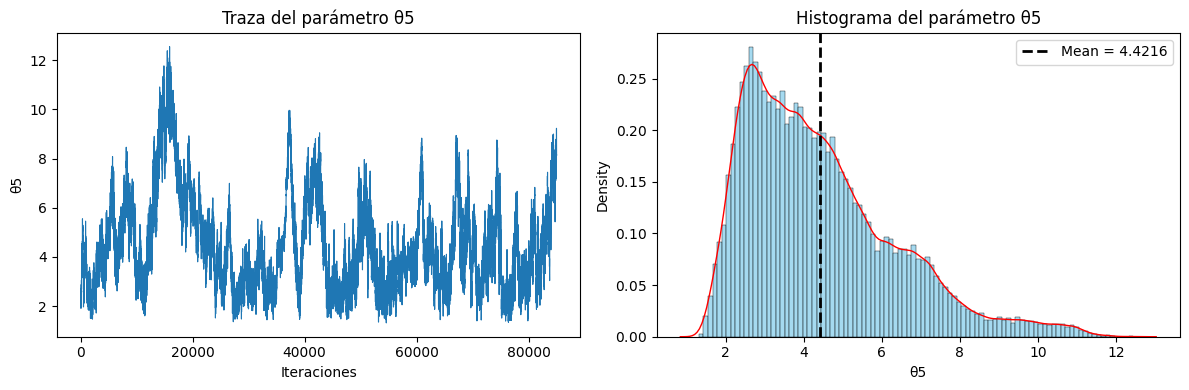

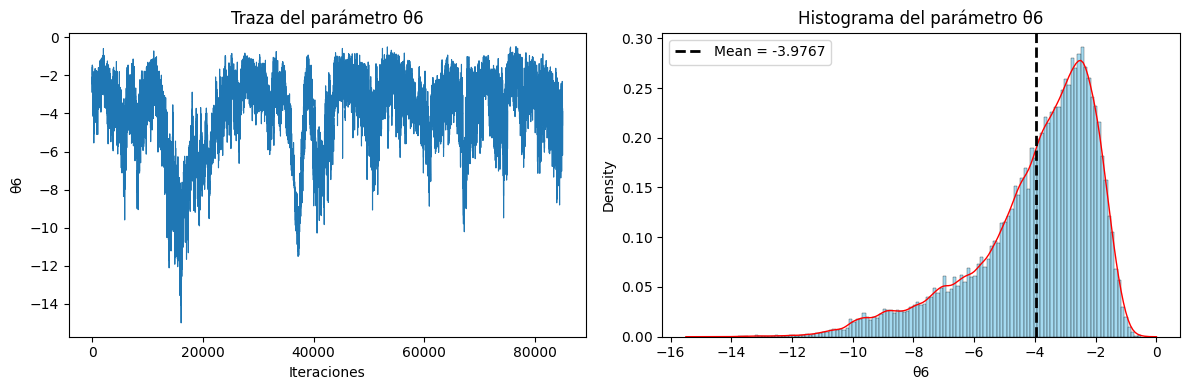

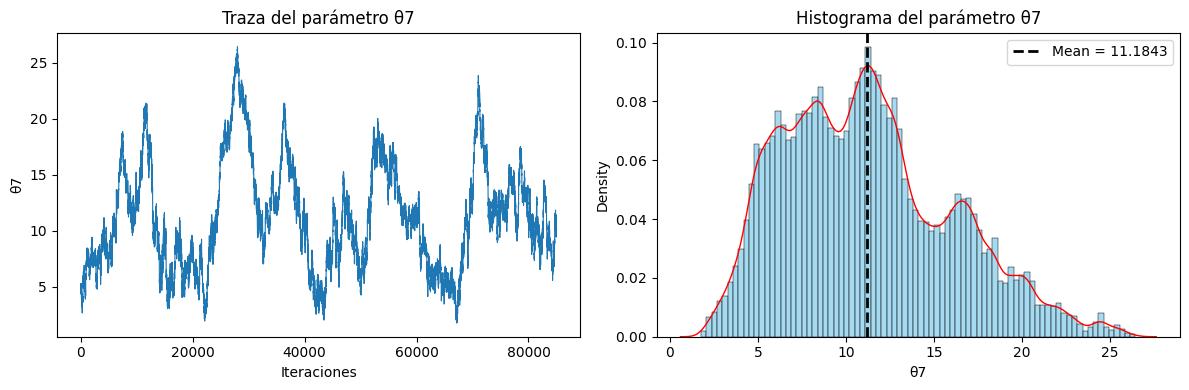

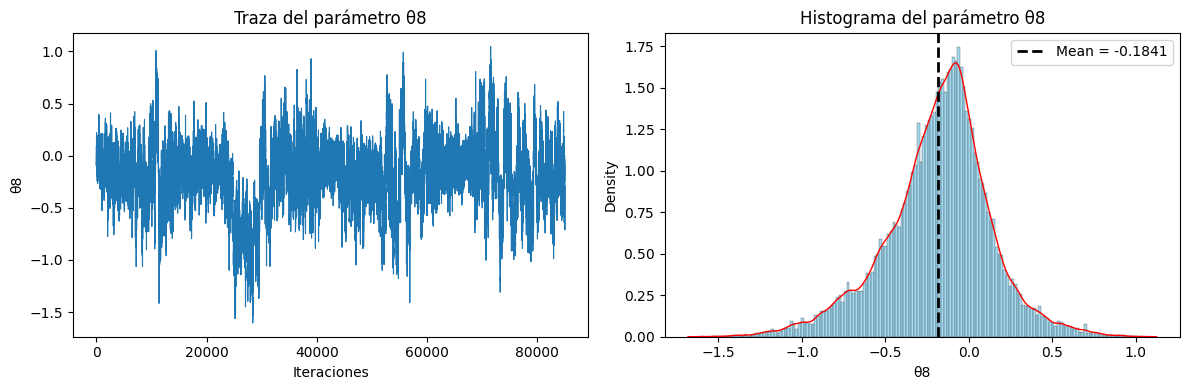

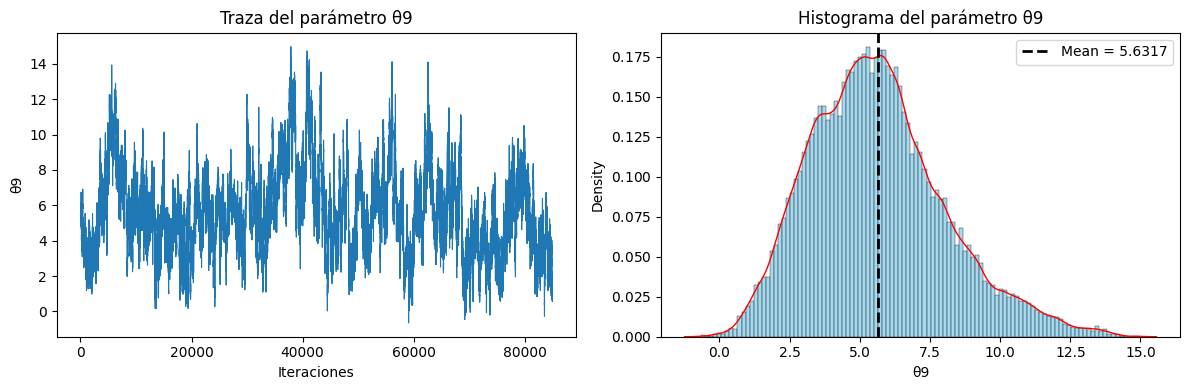

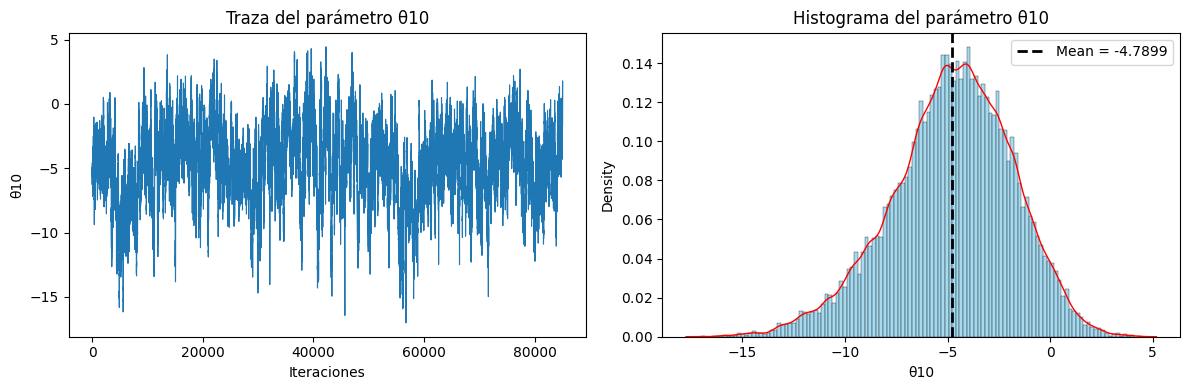

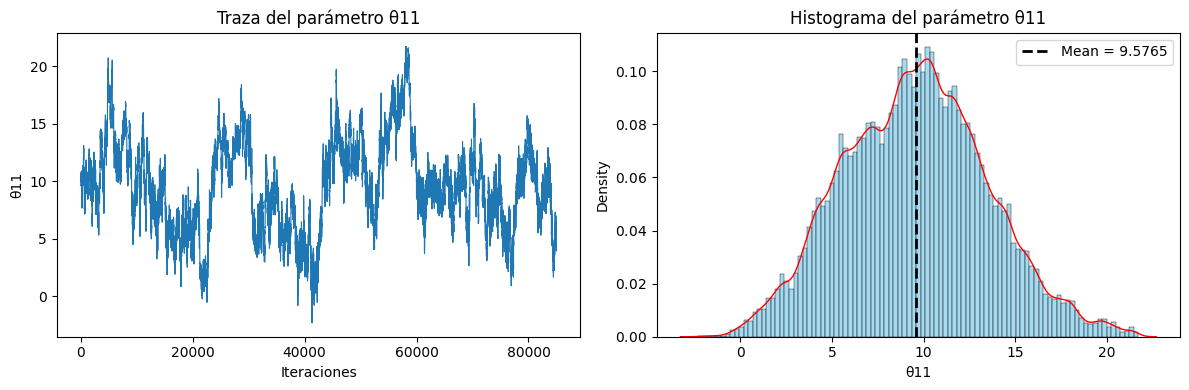

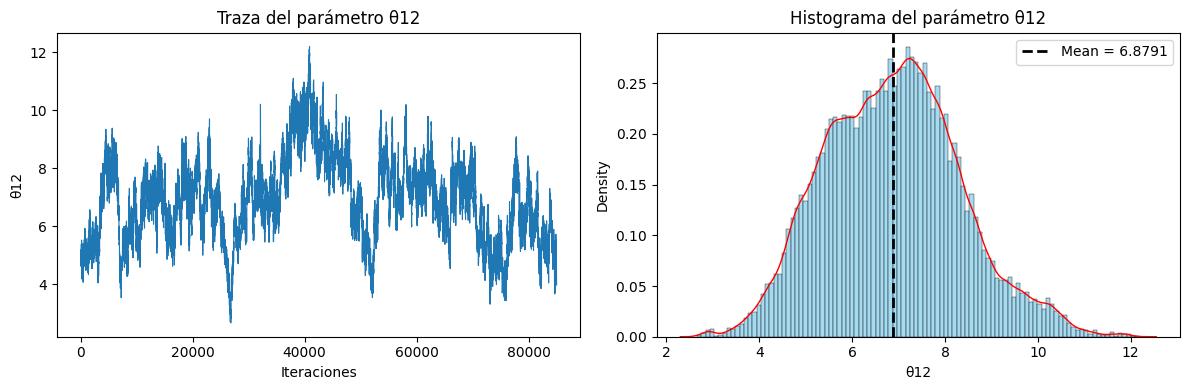

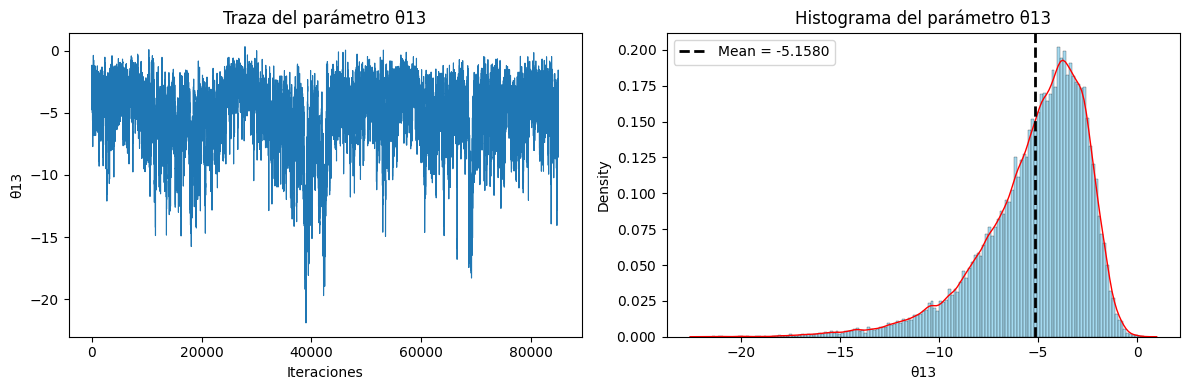

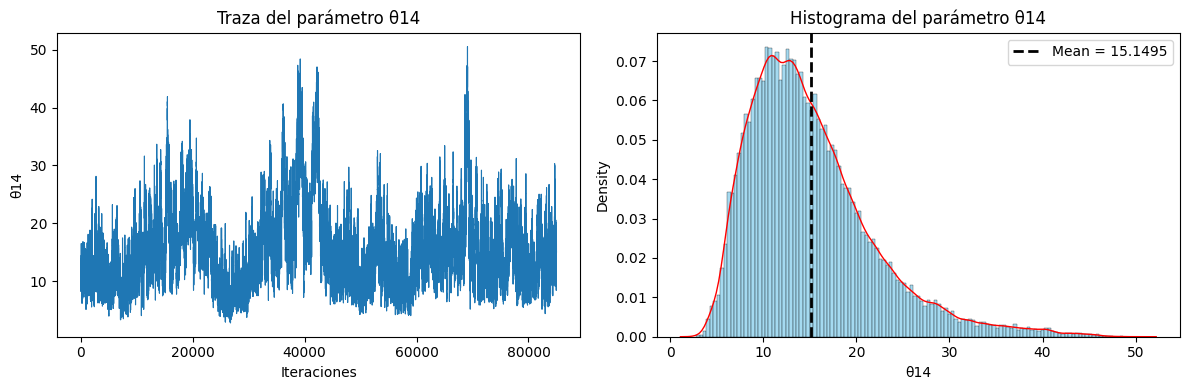

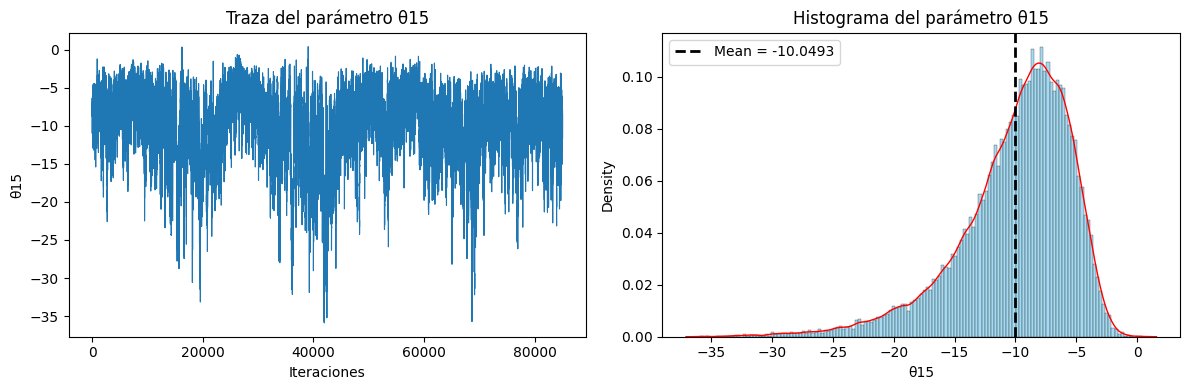

In [11]:

samples_theta1 = Posterior_A0_MCMC    
n_params, n_samples = samples_theta1.shape

for i, chain in enumerate(samples_theta1):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # ---------- CHAIN ----------
    ax_trace = axes[0]
    ax_trace.plot(chain, lw=0.8)
    ax_trace.set_title(f'Traza del parámetro θ{i+1}')
    ax_trace.set_xlabel('Iteraciones')
    ax_trace.set_ylabel(f'θ{i+1}')

    # ---------- HIST ----------
    ax_hist = axes[1]
    mean_val = np.mean(chain)
    unique_vals = np.unique(chain)

    if unique_vals.size == 1:
        ax_hist.bar(unique_vals[0], len(chain), width=0.0001, color='skyblue')
        ax_hist.set_xlim(unique_vals[0] - 0.001, unique_vals[0] + 0.001)
        ax_hist.set_ylabel('Frecuencia')
    else:
        sns.histplot(chain, bins='auto', stat='density', color='skyblue', ax=ax_hist)
        sns.kdeplot(chain, bw_adjust=0.8, color='red', lw=1, ax=ax_hist)

    ax_hist.axvline(mean_val, color='black', linestyle='--', label=f'Mean = {mean_val:.4f}' , linewidth = 2)
    ax_hist.legend()

    ax_hist.set_title(f'Histograma del parámetro θ{i+1}')
    ax_hist.set_xlabel(f'θ{i+1}')
    ax_hist.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax_hist.ticklabel_format(style='plain', axis='y')

    plt.tight_layout()
    plt.show()

## Impulse Response Functions (IRFs)

In [12]:
R1 = 80000 # Number of the posterior samples for the IRFS
HOR = 26 # Forecast period 

def bigAS(Posterior_A0 , R1):
    """
    Constructs an array of structural A₀ matrices from posterior draws.

    What it does:
    1. Takes `R1` posterior draws of the flattened A₀ parameters.
    2. For each draw, calls `A0_Mtx(...)` to reconstruct the n×n contemporaneous
       matrix A₀.
    3. Stacks these matrices into a 3-D array of shape (R1, n, n), ready for IRF computation.
    Returns
    -------
    As : ndarray, shape (R1, n, n)
        Stack of reconstructed A₀ matrices, one per posterior draw.
    """
    As = np.zeros((R1,n,n))
    for i in range(0,R1):
        As[i:,:,] = A0_Mtx(Posterior_A0[:,i])
    return As

def bigPhsi(Posterior_B , R1):
    """
    Builds companion‐form transition matrices from posterior draws of reduced‐form coefficients.

    What it does:
    1. Takes `R1` draws of the reduced‐form coefficient matrix B (shape R1×k×n).
    2. For each draw:
       a. Transposes B to get Xi of shape (n×m, n) if m = k/n.
       b. Constructs the companion‐matrix top block by dropping the last n columns of Xi.
       c. Builds the lower block as [I_{n(m−1)} | 0_{n(m−1)×n}] to shift lags.
       d. Vertically stacks these two blocks into an (n·m × n·m) matrix.
    3. Stacks all R1 companion matrices into an array of shape (R1, n·m, n·m),
       ready for IRF recursion.
    Returns
    -------
    phis : ndarray, shape (R1, n*m, n*m)
        Array of companion matrices, one per posterior draw.
    """
    phis = np.zeros((R1 , n*m , n*m))
    for i in range(0,R1):
        Xi= Posterior_B[i,:,:].T
        horizontal = np.hstack((np.eye(n*(m-1)) , np.zeros((n*(m-1),n))))
        phis[i:,:,] = np.vstack((Xi[:, :-1] , horizontal))
    return phis

@decorador_2
def IRF(Posterior_A0, Posterior_B, Horiz):
    """
    Compute impulse‐response functions (IRFs) for each posterior draw of a VAR.

    What it does:
    1. Constructs the companion‐form transition matrices (`phiss`) from `Posterior_B`.
    2. Reconstructs and inverts each structural matrix A₀ from `Posterior_A0` to get initial impact `Boi`.
    3. Uses a selector matrix `J` to extract the first block of the companion form.
    4. Recursively propagates the shock through `Horiz` periods:
       - At h=0, IRF is simply A₀⁻¹.
       - For h>0, IRF[h] = J · (companion^h) · J.T · A₀⁻¹.
    5. Stacks all IRFs into an array of shape (R1, n, n*(Horiz+1)), where R1 is the number
       of posterior draws.

    Returns
    -------
    GIR : ndarray, shape (R1, n, n*(Horiz+1))
        Array of impulse‐response functions. For each draw i:
          GIR[i, :, 0:n]        = A₀⁻¹ (impact at h=0),
          GIR[i, :, h*n:(h+1)*n] = IRF at horizon h (for h=1…Horiz).
    """
    
    J = np.hstack((np.eye(n), np.zeros((n, n * (m - 1)))))
    As = bigAS(Posterior_A0, R1)
    Boi = np.zeros((n, n))
    phiss = bigPhsi(Posterior_B, R1)
    GIR = np.zeros((R1, n, n * (Horiz + 1))) 
    
    for i in range(R1):
        bigAis = phiss[i, :, :]  # Companion matrix for draw i
        Boi = inv(As[i, :, :]) # Initial impact (h=0) 
        GIR[i, 0:n ,0:n] = Boi 

        # Recursive propagation for h = 1 … Horiz
        for k in range(Horiz):
            GIR[i, :, (k + 1) * n: (k + 2) * n] = J @ bigAis @ J.T @ Boi
            bigAis = bigAis @ phiss[i, :, :]  # advance the companion power
    
    return GIR

MCIF = IRF(Posterior_A0_MCMC , Posterior_B_MCMC , HOR)
MCIF.shape

La funcion demoro 938.2187774181366


(80000, 6, 162)

## Calculate confidence bands on the IRFs

In [13]:
q_90 = np.zeros((HOR, n, n))
q_84 = np.zeros((HOR, n, n))
q_50 = np.zeros((HOR, n, n))
q_10 = np.zeros((HOR, n, n))
q_16 = np.zeros((HOR, n, n))

# Quantiles
for i in range(n):
    for j in range(n):
        for h in range(HOR):
            q_90[h, j, i] = np.quantile(MCIF[:, i, j + (h-1) * n], 0.95)
            q_84[h, j, i] = np.quantile(MCIF[:, i, j + (h-1) * n], 0.84)
            q_50[h, j, i] = np.quantile(MCIF[:, i, j + (h-1) * n], 0.5)
            q_10[h, j, i] = np.quantile(MCIF[:, i, j + (h-1) * n], 0.05)
            q_16[h, j, i] = np.quantile(MCIF[:, i, j + (h-1) * n], 0.16)


er_90 = np.zeros((HOR, n, n))
er_84 = np.zeros((HOR, n, n))
er_10 = np.zeros((HOR, n, n))
er_16 = np.zeros((HOR, n, n))

for i in range(n):
    for k in range(n):
        er_90[:, i , k] = q_90[:,i,k]-q_50[:,i,k]
        er_84[:, i , k] = q_84[:, i , k]-q_50[:, i , k]
        er_10[:, i , k] = q_50[:, i , k]-q_10[:, i , k]
        er_16[:, i , k] = q_50[:, i , k]-q_16[:, i , k]



er_90 = q_90 - q_50 
er_84 = q_84 - q_50
er_10 = q_50 - q_10
er_16 = q_50 - q_16

## Graph IRFs (Only the first row of the IRFs are presented, because the research question relates to them only)

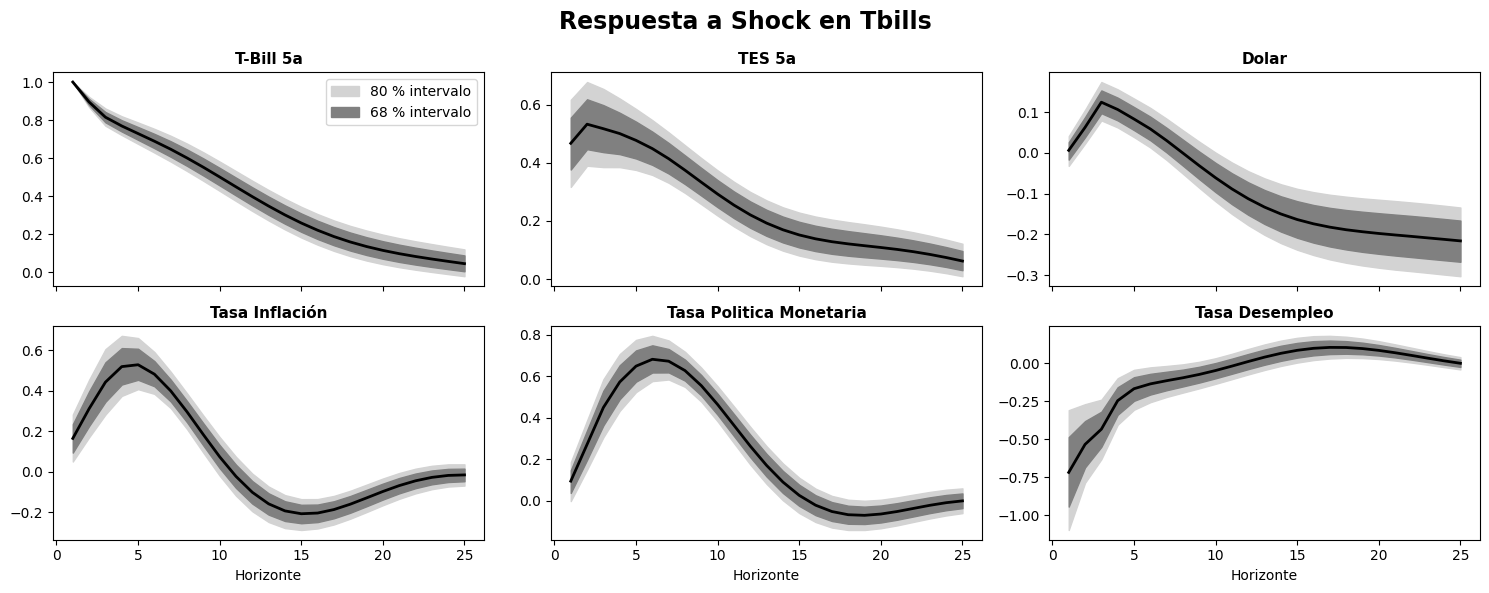

In [14]:

t = q_50.shape[0]          
n = q_50.shape[1]         
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(5 * ncols, 3 * nrows),sharex=True)

fig.suptitle('Respuesta a Shock en Tbills', fontsize=17,fontweight='bold', y=0.98 )
axes = np.atleast_2d(axes)
x = np.arange(1, t)
var_names = ["T-Bill 5a", "TES 5a", "Dolar", "Tasa Inflación", "Tasa Politica Monetaria", "Tasa Desempleo"]

for j in range(n):
    row, col = divmod(j, ncols)
    ax = axes[row, col]

    y       = q_50[1:, 0, j]
    low90   = q_10[1:, 0, j]
    up90    = q_90[1:, 0, j]
    low84   = q_16[1:, 0, j]
    up84    = q_84[1:, 0, j]
    ax.fill_between(x, low90, up90, color='lightgray', label='80 % intervalo')
    ax.fill_between(x, low84, up84, color='gray',      label='68 % intervalo')
    ax.plot(x, y, color='black', linewidth=2)
    ax.set_title(var_names[j], fontsize=11 ,fontweight='bold')
    if row == 0 and col == 0:
        ax.legend(loc="upper right")

for k in range(n, nrows * ncols):
    row, col = divmod(k, ncols)
    axes[row, col].set_visible(False)

axes[-1, 0].set_xlabel("Horizonte")
axes[-1, 1].set_xlabel("Horizonte")
axes[-1, 2].set_xlabel("Horizonte")
plt.tight_layout()
plt.show()

# FEVD

In [15]:
m_MCIRF = np.mean(MCIF, axis=0)


s= HOR+1
Ms = np.zeros((n , n*s))
Fs = np.zeros((n , n*s))
Ws = np.zeros((n , n*s))

def FEVD(IR , n , s):
    """
    Compute the Forecast Error Variance Decomposition (FEVD) from IRF matrices.

    Given the impulse response function (IR) array for a single Monte Carlo draw,
    this function calculates, for each horizon up to s-1, the proportion of the
    h-step ahead forecast error variance of each variable that is attributable
    to shocks in each variable.

    Returns
    -------
    Ws : ndarray, shape (n, n*s)
        FEVD proportions. For each horizon j (0 ≤ j < s), the block
        Ws[:, j*n:(j+1)*n] contains an n×n matrix where entry (i, k)
        is the fraction of variable i’s forecast error variance at
        horizon j explained by a unit shock to variable k.
    """

    Ms = np.zeros((n , n*s))
    Fs = np.zeros((n , n*s))
    Ws = np.zeros((n , n*s))

    Mss = (IR[0:n , 0:n]) * (IR[0:n , 0:n])
    Fss = (IR[0:n , 0:n]) @ (IR[0:n , 0:n]).T * np.eye(n)

    for j in range(1 , s-1):
        Mss = Mss + (IR[0:n , j*n:(j+1)*n]) * IR[0:n , j*n:(j+1)*n]
        Ms[:,j*n:(j+1)*n] = Mss
        Fss = Fss + (IR[0:n,j * n:(j+1) * n]) @ (IR[0:n,j * n:(j+1) * n]).T * np.eye(n)
        Fs[:,j * n:(j + 1) * n] = Fss
        Ws[:,j * n:(j + 1) * n] = np.linalg.solve(Fss, Mss)
    return Ws

ws = FEVD(m_MCIRF , n, s+1)


l=np.delete(ws[0, 0::n] + ws[0, 1::n], -1)
cs = np.delete(ws[0, 0::n] + ws[0, 1::n], -1)
u = -cs + 1

l1=np.delete(ws[1, 0::n] + ws[1, 1::n], -1)
cs1 = np.delete(ws[1, 0::n] + ws[1, 1::n], -1)
u1 = -cs1 + 1

l2=np.delete(ws[2, 1::n] + ws[2, 2::n], -1)
cs2 = np.delete(ws[2, 1::n] + ws[2, 2::n], -1)
u2 = -cs2 + 1


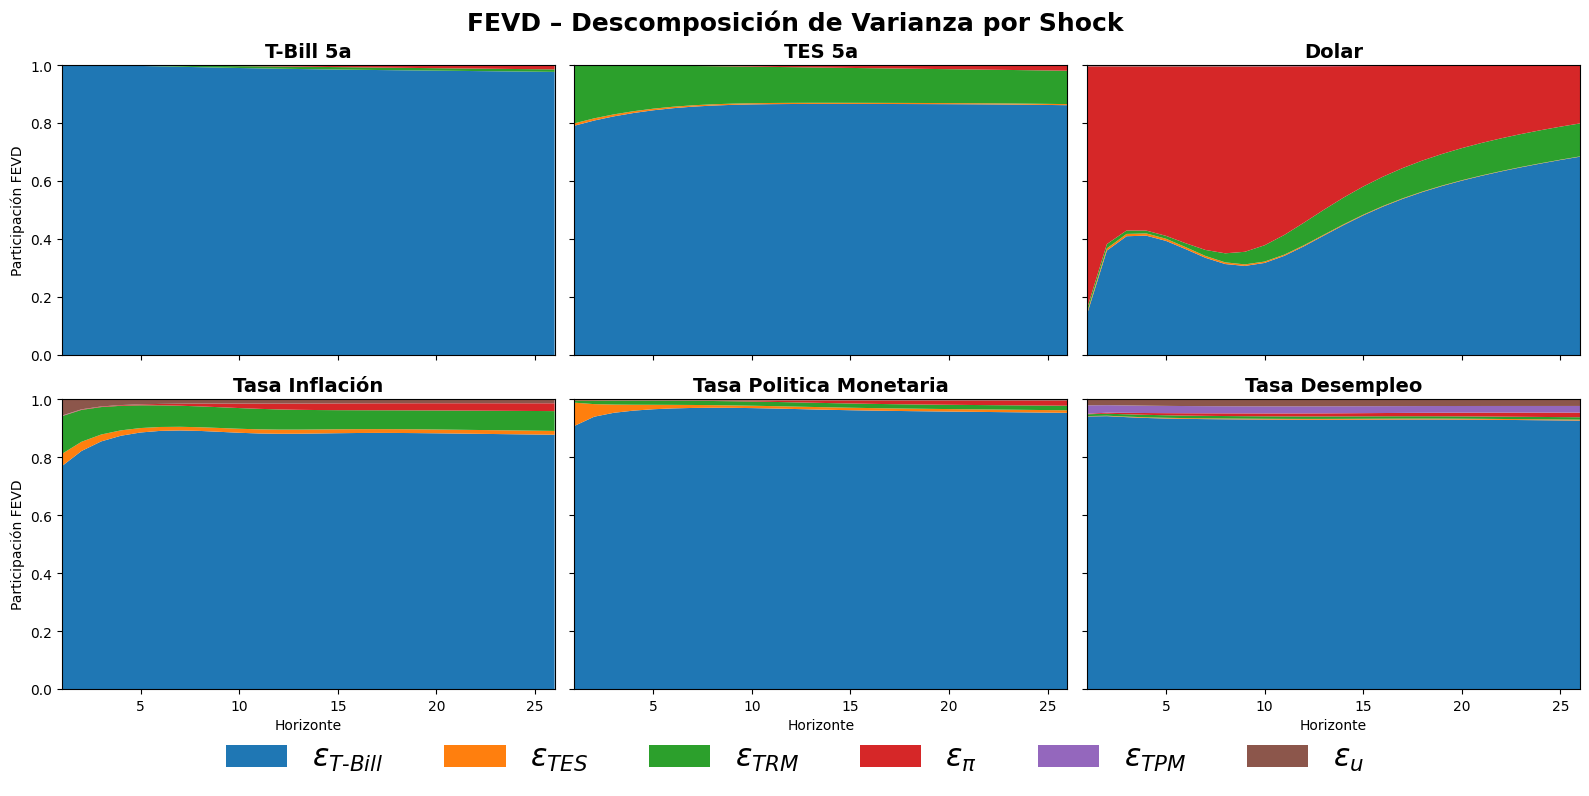

In [16]:
from matplotlib.patches import Patch

n = 6                           
s = ws.shape[1] // n             
horiz_full = np.arange(s)        
horiz = horiz_full[1:-1]           

fevd = ws.reshape(n, s, n)        
fevd_cut = fevd[:, 1:-1, :]      

# --- Names --------------------------------------------------------
var_names   = ["T-Bill 5a", "TES 5a", "Dolar", "Tasa Inflación", "Tasa Politica Monetaria", "Tasa Desempleo"]
shock_names = [r"$\varepsilon_{T\text{-}Bill}$",r"$\varepsilon_{TES}$",r"$\varepsilon_{TRM}$",r"$\varepsilon_{\pi}$",
    r"$\varepsilon_{TPM}$",r"$\varepsilon_{u}$",]

cmap = plt.get_cmap("tab20")
colors = cmap([0,2,4,6,8,10])    

fig, axes = plt.subplots(2,3,figsize=(16,8),sharex=True, sharey=True)
axes = axes.flatten()

for i, ax in enumerate(axes[:n]):
    data = fevd_cut[i].T          # (n_shocks, s-2)
    ax.stackplot(horiz, *data, colors=colors, linewidth=0)
    ax.set_title(var_names[i], fontsize=14, weight='semibold')
    ax.set_xlim(horiz[0], horiz[-1])
    ax.set_ylim(0,1)
    ax.tick_params(labelsize=10)
    if i%3==0:   ax.set_ylabel("Participación FEVD")
    if i>=3:     ax.set_xlabel("Horizonte")

for j in range(n, len(axes)):
    axes[j].set_visible(False)

legend_handles = [Patch(facecolor=colors[k]) for k in range(n)]
fig.legend(legend_handles,shock_names,loc='lower center',ncol=6,
    frameon=False,fontsize=22,bbox_to_anchor=(0.5, -0.02))

fig.suptitle("FEVD – Descomposición de Varianza por Shock",
             fontsize=18, weight='bold', y=0.97)
plt.tight_layout()
plt.subplots_adjust(bottom=0.12, top=0.90)
plt.show()

## Pablo Reyes 
